In [133]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import sys
import tensorflow as tf
import time

from tensorflow import keras
from tensorflow.keras.preprocessing import image
print(tf.__version__)

2.1.0


In [131]:
train_dir = "D:/ai/2-monkey-species/training/training"
valid_dir = "D:/ai/2-monkey-species/validation/validation"
label_file = "D:/ai/2-monkey-species/monkey_labels.txt"
print(os.path.exists(train_dir))
print(os.listdir(train_dir))

True
['n3', 'n5']


In [132]:
labels = pd.read_csv(label_file, header=0)
print(labels)

   Label    Latin Name              Common Name                     \
0  n3       macaca_fuscata\t        japanese_macaque                 
1  n5      cebus_capucinus\t        white_headed_capuchin            

    Train Images    Validation Images  
0             152                  30  
1             141                  28  


In [112]:
height = 128
width = 128
channels = 3
batch_size = 64
num_classes = 2

In [113]:
train_datagen = keras.preprocessing.image.ImageDataGenerator(
    rescale = 1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True,
    fill_mode = 'nearest',
)
train_generator = train_datagen.flow_from_directory(train_dir,
                                                   target_size = (height, width),
                                                   batch_size = batch_size,
                                                   seed = 7,
                                                   shuffle = True,
                                                   class_mode = "categorical")

Found 235 images belonging to 2 classes.


In [114]:
train_num = train_generator.samples
print(train_num)

235


In [115]:
valid_datagen = keras.preprocessing.image.ImageDataGenerator(rescale = 1./255)
valid_generator = valid_datagen.flow_from_directory(valid_dir,
                                                    target_size = (height, width),
                                                    batch_size = batch_size,
                                                    seed = 7,
                                                    shuffle = False,
                                                    class_mode = "categorical")

Found 58 images belonging to 2 classes.


In [116]:
valid_num = valid_generator.samples
print(valid_num)

58


[1. 0.]
[1. 0.]
[1. 0.]


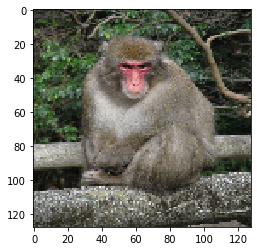

In [117]:
for i in range(valid_generator.samples-55):
    x, y = valid_generator.next()
    temp_img = image.array_to_img(x[0])
    plt.imshow(temp_img)
    print(y[0])

In [118]:
model = keras.models.Sequential([
    keras.layers.Conv2D(filters=32, kernel_size=3, padding='same',
                        activation='relu', input_shape=[width, height, channels]),
    keras.layers.Conv2D(filters=32, kernel_size=3, padding='same',
                        activation='relu'),
    keras.layers.MaxPool2D(pool_size=2),
    
    keras.layers.Conv2D(filters=64, kernel_size=3, padding='same',
                        activation='relu'),
    keras.layers.Conv2D(filters=64, kernel_size=3, padding='same',
                        activation='relu'),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(filters=128, kernel_size=3, padding='same',
                        activation='relu'),
    keras.layers.Conv2D(filters=128, kernel_size=3, padding='same',
                        activation='relu'),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(num_classes, activation='softmax'),
])

model.compile(loss="categorical_crossentropy",
              optimizer="adam", metrics=['accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 128, 128, 32)      896       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 128, 128, 32)      9248      
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 64, 64, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 64, 64, 64)        18496     
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 64, 64, 64)        36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 32, 32, 64)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 32, 32, 128)      

In [119]:
epochs = 20
history = model.fit_generator(train_generator,
                              steps_per_epoch = train_num // batch_size,
                              epochs = epochs,
                              validation_data = valid_generator,
                              validation_steps = valid_num // batch_size)

  ...
    to  
  ['...']
  ...
    to  
  ['...']
Train for 3 steps, validate for 1 steps
Epoch 1/20
3/3 [==============================] - 14s 5s/step - loss: 0.9307 - accuracy: 0.4971 - val_loss: 0.7018 - val_accuracy: 0.4828
Epoch 2/20
3/3 [==============================] - 14s 5s/step - loss: 0.6965 - accuracy: 0.5029 - val_loss: 0.6840 - val_accuracy: 0.7069
Epoch 3/20
3/3 [==============================] - 13s 4s/step - loss: 0.6751 - accuracy: 0.7018 - val_loss: 0.6539 - val_accuracy: 0.6034
Epoch 4/20
3/3 [==============================] - 14s 5s/step - loss: 0.6112 - accuracy: 0.6875 - val_loss: 0.6111 - val_accuracy: 0.6379
Epoch 5/20
3/3 [==============================] - 14s 5s/step - loss: 0.5818 - accuracy: 0.6784 - val_loss: 0.4626 - val_accuracy: 0.8103
Epoch 6/20
3/3 [==============================] - 14s 5s/step - loss: 0.4388 - accuracy: 0.8750 - val_loss: 0.5304 - val_accuracy: 0.7241
Epoch 7/20
3/3 [==============================] - 13s 4s/step - loss: 0.4569 - acc

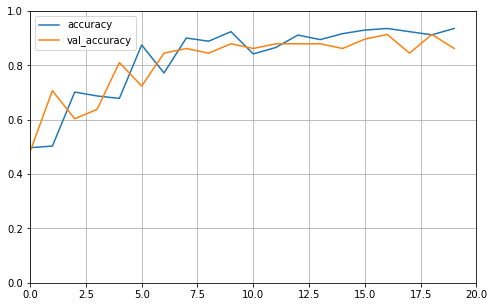

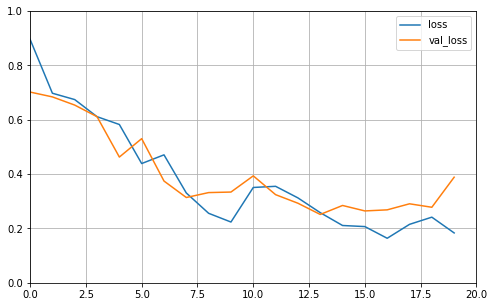

In [120]:
def plot_learning_curves(history, label, epcohs, min_value, max_value):
    data = {}
    data[label] = history.history[label]
    data['val_'+label] = history.history['val_'+label]
    pd.DataFrame(data).plot(figsize=(8, 5))
    plt.grid(True)
    plt.axis([0, epochs, min_value, max_value])
    plt.show()
    
plot_learning_curves(history, 'accuracy', epochs, 0, 1)
plot_learning_curves(history, 'loss', epochs, 0, 1)

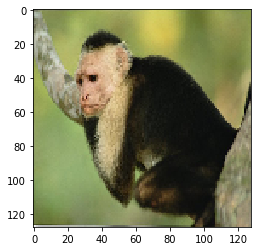

In [128]:
img = image.load_img("D:/ai/2-monkey-species/test/n5022.jpg", target_size = (128, 128))
plt.imshow(img)

In [129]:
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
preds = model.predict(img)
preds

array([[0., 1.]], dtype=float32)

In [69]:
for value in valid_generator:
    print(value[0])

(array([[[[0.28627452, 0.24705884, 0.2509804 ],
         [0.21176472, 0.19215688, 0.16862746],
         [0.12156864, 0.14509805, 0.10588236],
         ...,
         [0.05490196, 0.05490196, 0.04705883],
         [0.04313726, 0.04313726, 0.04313726],
         [0.02745098, 0.02745098, 0.01960784]],

        [[0.17254902, 0.16862746, 0.15294118],
         [0.15686275, 0.17254902, 0.11764707],
         [0.18823531, 0.20392159, 0.13725491],
         ...,
         [0.07058824, 0.05490196, 0.04313726],
         [0.09019608, 0.09803922, 0.08627451],
         [0.10588236, 0.15686275, 0.09019608]],

        [[0.21568629, 0.20000002, 0.15294118],
         [0.25882354, 0.24313727, 0.20000002],
         [0.16862746, 0.18431373, 0.11764707],
         ...,
         [0.11764707, 0.16470589, 0.10980393],
         [0.28627452, 0.3254902 , 0.28235295],
         [0.23529413, 0.29803923, 0.19607845]],

        ...,

        [[0.43529415, 0.43529415, 0.4039216 ],
         [0.227451  , 0.22352943, 0.20784315

(array([[[[0.28627452, 0.24705884, 0.2509804 ],
         [0.21176472, 0.19215688, 0.16862746],
         [0.12156864, 0.14509805, 0.10588236],
         ...,
         [0.05490196, 0.05490196, 0.04705883],
         [0.04313726, 0.04313726, 0.04313726],
         [0.02745098, 0.02745098, 0.01960784]],

        [[0.17254902, 0.16862746, 0.15294118],
         [0.15686275, 0.17254902, 0.11764707],
         [0.18823531, 0.20392159, 0.13725491],
         ...,
         [0.07058824, 0.05490196, 0.04313726],
         [0.09019608, 0.09803922, 0.08627451],
         [0.10588236, 0.15686275, 0.09019608]],

        [[0.21568629, 0.20000002, 0.15294118],
         [0.25882354, 0.24313727, 0.20000002],
         [0.16862746, 0.18431373, 0.11764707],
         ...,
         [0.11764707, 0.16470589, 0.10980393],
         [0.28627452, 0.3254902 , 0.28235295],
         [0.23529413, 0.29803923, 0.19607845]],

        ...,

        [[0.43529415, 0.43529415, 0.4039216 ],
         [0.227451  , 0.22352943, 0.20784315

(array([[[[0.28627452, 0.24705884, 0.2509804 ],
         [0.21176472, 0.19215688, 0.16862746],
         [0.12156864, 0.14509805, 0.10588236],
         ...,
         [0.05490196, 0.05490196, 0.04705883],
         [0.04313726, 0.04313726, 0.04313726],
         [0.02745098, 0.02745098, 0.01960784]],

        [[0.17254902, 0.16862746, 0.15294118],
         [0.15686275, 0.17254902, 0.11764707],
         [0.18823531, 0.20392159, 0.13725491],
         ...,
         [0.07058824, 0.05490196, 0.04313726],
         [0.09019608, 0.09803922, 0.08627451],
         [0.10588236, 0.15686275, 0.09019608]],

        [[0.21568629, 0.20000002, 0.15294118],
         [0.25882354, 0.24313727, 0.20000002],
         [0.16862746, 0.18431373, 0.11764707],
         ...,
         [0.11764707, 0.16470589, 0.10980393],
         [0.28627452, 0.3254902 , 0.28235295],
         [0.23529413, 0.29803923, 0.19607845]],

        ...,

        [[0.43529415, 0.43529415, 0.4039216 ],
         [0.227451  , 0.22352943, 0.20784315

(array([[[[0.28627452, 0.24705884, 0.2509804 ],
         [0.21176472, 0.19215688, 0.16862746],
         [0.12156864, 0.14509805, 0.10588236],
         ...,
         [0.05490196, 0.05490196, 0.04705883],
         [0.04313726, 0.04313726, 0.04313726],
         [0.02745098, 0.02745098, 0.01960784]],

        [[0.17254902, 0.16862746, 0.15294118],
         [0.15686275, 0.17254902, 0.11764707],
         [0.18823531, 0.20392159, 0.13725491],
         ...,
         [0.07058824, 0.05490196, 0.04313726],
         [0.09019608, 0.09803922, 0.08627451],
         [0.10588236, 0.15686275, 0.09019608]],

        [[0.21568629, 0.20000002, 0.15294118],
         [0.25882354, 0.24313727, 0.20000002],
         [0.16862746, 0.18431373, 0.11764707],
         ...,
         [0.11764707, 0.16470589, 0.10980393],
         [0.28627452, 0.3254902 , 0.28235295],
         [0.23529413, 0.29803923, 0.19607845]],

        ...,

        [[0.43529415, 0.43529415, 0.4039216 ],
         [0.227451  , 0.22352943, 0.20784315

(array([[[[0.28627452, 0.24705884, 0.2509804 ],
         [0.21176472, 0.19215688, 0.16862746],
         [0.12156864, 0.14509805, 0.10588236],
         ...,
         [0.05490196, 0.05490196, 0.04705883],
         [0.04313726, 0.04313726, 0.04313726],
         [0.02745098, 0.02745098, 0.01960784]],

        [[0.17254902, 0.16862746, 0.15294118],
         [0.15686275, 0.17254902, 0.11764707],
         [0.18823531, 0.20392159, 0.13725491],
         ...,
         [0.07058824, 0.05490196, 0.04313726],
         [0.09019608, 0.09803922, 0.08627451],
         [0.10588236, 0.15686275, 0.09019608]],

        [[0.21568629, 0.20000002, 0.15294118],
         [0.25882354, 0.24313727, 0.20000002],
         [0.16862746, 0.18431373, 0.11764707],
         ...,
         [0.11764707, 0.16470589, 0.10980393],
         [0.28627452, 0.3254902 , 0.28235295],
         [0.23529413, 0.29803923, 0.19607845]],

        ...,

        [[0.43529415, 0.43529415, 0.4039216 ],
         [0.227451  , 0.22352943, 0.20784315

(array([[[[0.28627452, 0.24705884, 0.2509804 ],
         [0.21176472, 0.19215688, 0.16862746],
         [0.12156864, 0.14509805, 0.10588236],
         ...,
         [0.05490196, 0.05490196, 0.04705883],
         [0.04313726, 0.04313726, 0.04313726],
         [0.02745098, 0.02745098, 0.01960784]],

        [[0.17254902, 0.16862746, 0.15294118],
         [0.15686275, 0.17254902, 0.11764707],
         [0.18823531, 0.20392159, 0.13725491],
         ...,
         [0.07058824, 0.05490196, 0.04313726],
         [0.09019608, 0.09803922, 0.08627451],
         [0.10588236, 0.15686275, 0.09019608]],

        [[0.21568629, 0.20000002, 0.15294118],
         [0.25882354, 0.24313727, 0.20000002],
         [0.16862746, 0.18431373, 0.11764707],
         ...,
         [0.11764707, 0.16470589, 0.10980393],
         [0.28627452, 0.3254902 , 0.28235295],
         [0.23529413, 0.29803923, 0.19607845]],

        ...,

        [[0.43529415, 0.43529415, 0.4039216 ],
         [0.227451  , 0.22352943, 0.20784315

(array([[[[0.28627452, 0.24705884, 0.2509804 ],
         [0.21176472, 0.19215688, 0.16862746],
         [0.12156864, 0.14509805, 0.10588236],
         ...,
         [0.05490196, 0.05490196, 0.04705883],
         [0.04313726, 0.04313726, 0.04313726],
         [0.02745098, 0.02745098, 0.01960784]],

        [[0.17254902, 0.16862746, 0.15294118],
         [0.15686275, 0.17254902, 0.11764707],
         [0.18823531, 0.20392159, 0.13725491],
         ...,
         [0.07058824, 0.05490196, 0.04313726],
         [0.09019608, 0.09803922, 0.08627451],
         [0.10588236, 0.15686275, 0.09019608]],

        [[0.21568629, 0.20000002, 0.15294118],
         [0.25882354, 0.24313727, 0.20000002],
         [0.16862746, 0.18431373, 0.11764707],
         ...,
         [0.11764707, 0.16470589, 0.10980393],
         [0.28627452, 0.3254902 , 0.28235295],
         [0.23529413, 0.29803923, 0.19607845]],

        ...,

        [[0.43529415, 0.43529415, 0.4039216 ],
         [0.227451  , 0.22352943, 0.20784315

(array([[[[0.28627452, 0.24705884, 0.2509804 ],
         [0.21176472, 0.19215688, 0.16862746],
         [0.12156864, 0.14509805, 0.10588236],
         ...,
         [0.05490196, 0.05490196, 0.04705883],
         [0.04313726, 0.04313726, 0.04313726],
         [0.02745098, 0.02745098, 0.01960784]],

        [[0.17254902, 0.16862746, 0.15294118],
         [0.15686275, 0.17254902, 0.11764707],
         [0.18823531, 0.20392159, 0.13725491],
         ...,
         [0.07058824, 0.05490196, 0.04313726],
         [0.09019608, 0.09803922, 0.08627451],
         [0.10588236, 0.15686275, 0.09019608]],

        [[0.21568629, 0.20000002, 0.15294118],
         [0.25882354, 0.24313727, 0.20000002],
         [0.16862746, 0.18431373, 0.11764707],
         ...,
         [0.11764707, 0.16470589, 0.10980393],
         [0.28627452, 0.3254902 , 0.28235295],
         [0.23529413, 0.29803923, 0.19607845]],

        ...,

        [[0.43529415, 0.43529415, 0.4039216 ],
         [0.227451  , 0.22352943, 0.20784315

(array([[[[0.28627452, 0.24705884, 0.2509804 ],
         [0.21176472, 0.19215688, 0.16862746],
         [0.12156864, 0.14509805, 0.10588236],
         ...,
         [0.05490196, 0.05490196, 0.04705883],
         [0.04313726, 0.04313726, 0.04313726],
         [0.02745098, 0.02745098, 0.01960784]],

        [[0.17254902, 0.16862746, 0.15294118],
         [0.15686275, 0.17254902, 0.11764707],
         [0.18823531, 0.20392159, 0.13725491],
         ...,
         [0.07058824, 0.05490196, 0.04313726],
         [0.09019608, 0.09803922, 0.08627451],
         [0.10588236, 0.15686275, 0.09019608]],

        [[0.21568629, 0.20000002, 0.15294118],
         [0.25882354, 0.24313727, 0.20000002],
         [0.16862746, 0.18431373, 0.11764707],
         ...,
         [0.11764707, 0.16470589, 0.10980393],
         [0.28627452, 0.3254902 , 0.28235295],
         [0.23529413, 0.29803923, 0.19607845]],

        ...,

        [[0.43529415, 0.43529415, 0.4039216 ],
         [0.227451  , 0.22352943, 0.20784315

(array([[[[0.28627452, 0.24705884, 0.2509804 ],
         [0.21176472, 0.19215688, 0.16862746],
         [0.12156864, 0.14509805, 0.10588236],
         ...,
         [0.05490196, 0.05490196, 0.04705883],
         [0.04313726, 0.04313726, 0.04313726],
         [0.02745098, 0.02745098, 0.01960784]],

        [[0.17254902, 0.16862746, 0.15294118],
         [0.15686275, 0.17254902, 0.11764707],
         [0.18823531, 0.20392159, 0.13725491],
         ...,
         [0.07058824, 0.05490196, 0.04313726],
         [0.09019608, 0.09803922, 0.08627451],
         [0.10588236, 0.15686275, 0.09019608]],

        [[0.21568629, 0.20000002, 0.15294118],
         [0.25882354, 0.24313727, 0.20000002],
         [0.16862746, 0.18431373, 0.11764707],
         ...,
         [0.11764707, 0.16470589, 0.10980393],
         [0.28627452, 0.3254902 , 0.28235295],
         [0.23529413, 0.29803923, 0.19607845]],

        ...,

        [[0.43529415, 0.43529415, 0.4039216 ],
         [0.227451  , 0.22352943, 0.20784315

(array([[[[0.28627452, 0.24705884, 0.2509804 ],
         [0.21176472, 0.19215688, 0.16862746],
         [0.12156864, 0.14509805, 0.10588236],
         ...,
         [0.05490196, 0.05490196, 0.04705883],
         [0.04313726, 0.04313726, 0.04313726],
         [0.02745098, 0.02745098, 0.01960784]],

        [[0.17254902, 0.16862746, 0.15294118],
         [0.15686275, 0.17254902, 0.11764707],
         [0.18823531, 0.20392159, 0.13725491],
         ...,
         [0.07058824, 0.05490196, 0.04313726],
         [0.09019608, 0.09803922, 0.08627451],
         [0.10588236, 0.15686275, 0.09019608]],

        [[0.21568629, 0.20000002, 0.15294118],
         [0.25882354, 0.24313727, 0.20000002],
         [0.16862746, 0.18431373, 0.11764707],
         ...,
         [0.11764707, 0.16470589, 0.10980393],
         [0.28627452, 0.3254902 , 0.28235295],
         [0.23529413, 0.29803923, 0.19607845]],

        ...,

        [[0.43529415, 0.43529415, 0.4039216 ],
         [0.227451  , 0.22352943, 0.20784315

(array([[[[0.28627452, 0.24705884, 0.2509804 ],
         [0.21176472, 0.19215688, 0.16862746],
         [0.12156864, 0.14509805, 0.10588236],
         ...,
         [0.05490196, 0.05490196, 0.04705883],
         [0.04313726, 0.04313726, 0.04313726],
         [0.02745098, 0.02745098, 0.01960784]],

        [[0.17254902, 0.16862746, 0.15294118],
         [0.15686275, 0.17254902, 0.11764707],
         [0.18823531, 0.20392159, 0.13725491],
         ...,
         [0.07058824, 0.05490196, 0.04313726],
         [0.09019608, 0.09803922, 0.08627451],
         [0.10588236, 0.15686275, 0.09019608]],

        [[0.21568629, 0.20000002, 0.15294118],
         [0.25882354, 0.24313727, 0.20000002],
         [0.16862746, 0.18431373, 0.11764707],
         ...,
         [0.11764707, 0.16470589, 0.10980393],
         [0.28627452, 0.3254902 , 0.28235295],
         [0.23529413, 0.29803923, 0.19607845]],

        ...,

        [[0.43529415, 0.43529415, 0.4039216 ],
         [0.227451  , 0.22352943, 0.20784315

(array([[[[0.28627452, 0.24705884, 0.2509804 ],
         [0.21176472, 0.19215688, 0.16862746],
         [0.12156864, 0.14509805, 0.10588236],
         ...,
         [0.05490196, 0.05490196, 0.04705883],
         [0.04313726, 0.04313726, 0.04313726],
         [0.02745098, 0.02745098, 0.01960784]],

        [[0.17254902, 0.16862746, 0.15294118],
         [0.15686275, 0.17254902, 0.11764707],
         [0.18823531, 0.20392159, 0.13725491],
         ...,
         [0.07058824, 0.05490196, 0.04313726],
         [0.09019608, 0.09803922, 0.08627451],
         [0.10588236, 0.15686275, 0.09019608]],

        [[0.21568629, 0.20000002, 0.15294118],
         [0.25882354, 0.24313727, 0.20000002],
         [0.16862746, 0.18431373, 0.11764707],
         ...,
         [0.11764707, 0.16470589, 0.10980393],
         [0.28627452, 0.3254902 , 0.28235295],
         [0.23529413, 0.29803923, 0.19607845]],

        ...,

        [[0.43529415, 0.43529415, 0.4039216 ],
         [0.227451  , 0.22352943, 0.20784315

(array([[[[0.28627452, 0.24705884, 0.2509804 ],
         [0.21176472, 0.19215688, 0.16862746],
         [0.12156864, 0.14509805, 0.10588236],
         ...,
         [0.05490196, 0.05490196, 0.04705883],
         [0.04313726, 0.04313726, 0.04313726],
         [0.02745098, 0.02745098, 0.01960784]],

        [[0.17254902, 0.16862746, 0.15294118],
         [0.15686275, 0.17254902, 0.11764707],
         [0.18823531, 0.20392159, 0.13725491],
         ...,
         [0.07058824, 0.05490196, 0.04313726],
         [0.09019608, 0.09803922, 0.08627451],
         [0.10588236, 0.15686275, 0.09019608]],

        [[0.21568629, 0.20000002, 0.15294118],
         [0.25882354, 0.24313727, 0.20000002],
         [0.16862746, 0.18431373, 0.11764707],
         ...,
         [0.11764707, 0.16470589, 0.10980393],
         [0.28627452, 0.3254902 , 0.28235295],
         [0.23529413, 0.29803923, 0.19607845]],

        ...,

        [[0.43529415, 0.43529415, 0.4039216 ],
         [0.227451  , 0.22352943, 0.20784315

(array([[[[0.28627452, 0.24705884, 0.2509804 ],
         [0.21176472, 0.19215688, 0.16862746],
         [0.12156864, 0.14509805, 0.10588236],
         ...,
         [0.05490196, 0.05490196, 0.04705883],
         [0.04313726, 0.04313726, 0.04313726],
         [0.02745098, 0.02745098, 0.01960784]],

        [[0.17254902, 0.16862746, 0.15294118],
         [0.15686275, 0.17254902, 0.11764707],
         [0.18823531, 0.20392159, 0.13725491],
         ...,
         [0.07058824, 0.05490196, 0.04313726],
         [0.09019608, 0.09803922, 0.08627451],
         [0.10588236, 0.15686275, 0.09019608]],

        [[0.21568629, 0.20000002, 0.15294118],
         [0.25882354, 0.24313727, 0.20000002],
         [0.16862746, 0.18431373, 0.11764707],
         ...,
         [0.11764707, 0.16470589, 0.10980393],
         [0.28627452, 0.3254902 , 0.28235295],
         [0.23529413, 0.29803923, 0.19607845]],

        ...,

        [[0.43529415, 0.43529415, 0.4039216 ],
         [0.227451  , 0.22352943, 0.20784315

(array([[[[0.28627452, 0.24705884, 0.2509804 ],
         [0.21176472, 0.19215688, 0.16862746],
         [0.12156864, 0.14509805, 0.10588236],
         ...,
         [0.05490196, 0.05490196, 0.04705883],
         [0.04313726, 0.04313726, 0.04313726],
         [0.02745098, 0.02745098, 0.01960784]],

        [[0.17254902, 0.16862746, 0.15294118],
         [0.15686275, 0.17254902, 0.11764707],
         [0.18823531, 0.20392159, 0.13725491],
         ...,
         [0.07058824, 0.05490196, 0.04313726],
         [0.09019608, 0.09803922, 0.08627451],
         [0.10588236, 0.15686275, 0.09019608]],

        [[0.21568629, 0.20000002, 0.15294118],
         [0.25882354, 0.24313727, 0.20000002],
         [0.16862746, 0.18431373, 0.11764707],
         ...,
         [0.11764707, 0.16470589, 0.10980393],
         [0.28627452, 0.3254902 , 0.28235295],
         [0.23529413, 0.29803923, 0.19607845]],

        ...,

        [[0.43529415, 0.43529415, 0.4039216 ],
         [0.227451  , 0.22352943, 0.20784315

(array([[[[0.28627452, 0.24705884, 0.2509804 ],
         [0.21176472, 0.19215688, 0.16862746],
         [0.12156864, 0.14509805, 0.10588236],
         ...,
         [0.05490196, 0.05490196, 0.04705883],
         [0.04313726, 0.04313726, 0.04313726],
         [0.02745098, 0.02745098, 0.01960784]],

        [[0.17254902, 0.16862746, 0.15294118],
         [0.15686275, 0.17254902, 0.11764707],
         [0.18823531, 0.20392159, 0.13725491],
         ...,
         [0.07058824, 0.05490196, 0.04313726],
         [0.09019608, 0.09803922, 0.08627451],
         [0.10588236, 0.15686275, 0.09019608]],

        [[0.21568629, 0.20000002, 0.15294118],
         [0.25882354, 0.24313727, 0.20000002],
         [0.16862746, 0.18431373, 0.11764707],
         ...,
         [0.11764707, 0.16470589, 0.10980393],
         [0.28627452, 0.3254902 , 0.28235295],
         [0.23529413, 0.29803923, 0.19607845]],

        ...,

        [[0.43529415, 0.43529415, 0.4039216 ],
         [0.227451  , 0.22352943, 0.20784315

(array([[[[0.28627452, 0.24705884, 0.2509804 ],
         [0.21176472, 0.19215688, 0.16862746],
         [0.12156864, 0.14509805, 0.10588236],
         ...,
         [0.05490196, 0.05490196, 0.04705883],
         [0.04313726, 0.04313726, 0.04313726],
         [0.02745098, 0.02745098, 0.01960784]],

        [[0.17254902, 0.16862746, 0.15294118],
         [0.15686275, 0.17254902, 0.11764707],
         [0.18823531, 0.20392159, 0.13725491],
         ...,
         [0.07058824, 0.05490196, 0.04313726],
         [0.09019608, 0.09803922, 0.08627451],
         [0.10588236, 0.15686275, 0.09019608]],

        [[0.21568629, 0.20000002, 0.15294118],
         [0.25882354, 0.24313727, 0.20000002],
         [0.16862746, 0.18431373, 0.11764707],
         ...,
         [0.11764707, 0.16470589, 0.10980393],
         [0.28627452, 0.3254902 , 0.28235295],
         [0.23529413, 0.29803923, 0.19607845]],

        ...,

        [[0.43529415, 0.43529415, 0.4039216 ],
         [0.227451  , 0.22352943, 0.20784315

(array([[[[0.28627452, 0.24705884, 0.2509804 ],
         [0.21176472, 0.19215688, 0.16862746],
         [0.12156864, 0.14509805, 0.10588236],
         ...,
         [0.05490196, 0.05490196, 0.04705883],
         [0.04313726, 0.04313726, 0.04313726],
         [0.02745098, 0.02745098, 0.01960784]],

        [[0.17254902, 0.16862746, 0.15294118],
         [0.15686275, 0.17254902, 0.11764707],
         [0.18823531, 0.20392159, 0.13725491],
         ...,
         [0.07058824, 0.05490196, 0.04313726],
         [0.09019608, 0.09803922, 0.08627451],
         [0.10588236, 0.15686275, 0.09019608]],

        [[0.21568629, 0.20000002, 0.15294118],
         [0.25882354, 0.24313727, 0.20000002],
         [0.16862746, 0.18431373, 0.11764707],
         ...,
         [0.11764707, 0.16470589, 0.10980393],
         [0.28627452, 0.3254902 , 0.28235295],
         [0.23529413, 0.29803923, 0.19607845]],

        ...,

        [[0.43529415, 0.43529415, 0.4039216 ],
         [0.227451  , 0.22352943, 0.20784315

(array([[[[0.28627452, 0.24705884, 0.2509804 ],
         [0.21176472, 0.19215688, 0.16862746],
         [0.12156864, 0.14509805, 0.10588236],
         ...,
         [0.05490196, 0.05490196, 0.04705883],
         [0.04313726, 0.04313726, 0.04313726],
         [0.02745098, 0.02745098, 0.01960784]],

        [[0.17254902, 0.16862746, 0.15294118],
         [0.15686275, 0.17254902, 0.11764707],
         [0.18823531, 0.20392159, 0.13725491],
         ...,
         [0.07058824, 0.05490196, 0.04313726],
         [0.09019608, 0.09803922, 0.08627451],
         [0.10588236, 0.15686275, 0.09019608]],

        [[0.21568629, 0.20000002, 0.15294118],
         [0.25882354, 0.24313727, 0.20000002],
         [0.16862746, 0.18431373, 0.11764707],
         ...,
         [0.11764707, 0.16470589, 0.10980393],
         [0.28627452, 0.3254902 , 0.28235295],
         [0.23529413, 0.29803923, 0.19607845]],

        ...,

        [[0.43529415, 0.43529415, 0.4039216 ],
         [0.227451  , 0.22352943, 0.20784315

(array([[[[0.28627452, 0.24705884, 0.2509804 ],
         [0.21176472, 0.19215688, 0.16862746],
         [0.12156864, 0.14509805, 0.10588236],
         ...,
         [0.05490196, 0.05490196, 0.04705883],
         [0.04313726, 0.04313726, 0.04313726],
         [0.02745098, 0.02745098, 0.01960784]],

        [[0.17254902, 0.16862746, 0.15294118],
         [0.15686275, 0.17254902, 0.11764707],
         [0.18823531, 0.20392159, 0.13725491],
         ...,
         [0.07058824, 0.05490196, 0.04313726],
         [0.09019608, 0.09803922, 0.08627451],
         [0.10588236, 0.15686275, 0.09019608]],

        [[0.21568629, 0.20000002, 0.15294118],
         [0.25882354, 0.24313727, 0.20000002],
         [0.16862746, 0.18431373, 0.11764707],
         ...,
         [0.11764707, 0.16470589, 0.10980393],
         [0.28627452, 0.3254902 , 0.28235295],
         [0.23529413, 0.29803923, 0.19607845]],

        ...,

        [[0.43529415, 0.43529415, 0.4039216 ],
         [0.227451  , 0.22352943, 0.20784315

KeyboardInterrupt: 

In [67]:
valid_generator.__len__()

1